<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11228\734020379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist = False, color = 'b')


<Axes: xlabel='ConvertedComp', ylabel='Density'>

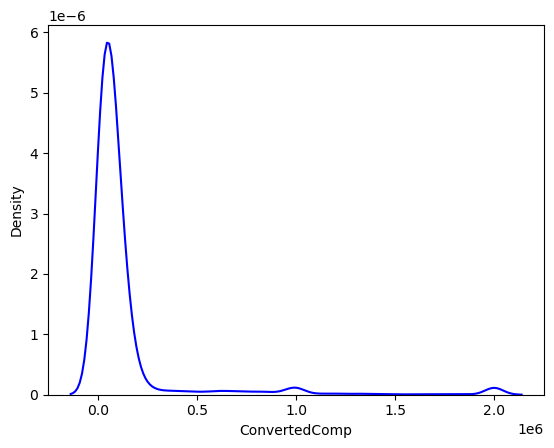

In [4]:
# your code goes here
sns.distplot(df['ConvertedComp'], hist = False, color = 'b')

Plot the histogram for the column `ConvertedComp`.


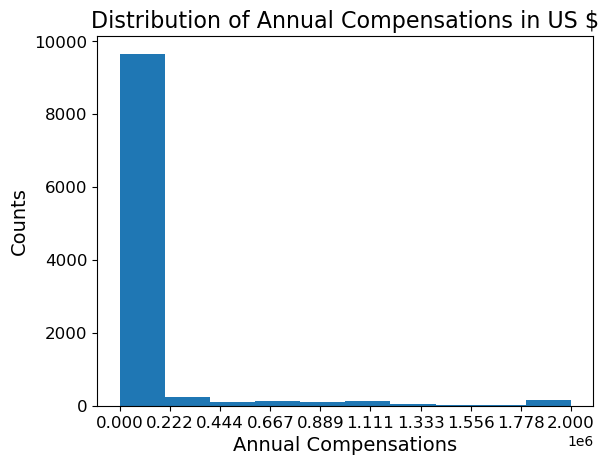

In [14]:
# your code goes here

# Drop na values
df.dropna(subset = ['ConvertedComp'])

# Let's bin the values of 'ConvertedComp'
bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 10)

# Let's use pandas function "cut" to segment and sort the data values into bins
df['ConvertedComp-binned'] = pd.cut(df['ConvertedComp'], bins, include_lowest =  True)


# Let's create the histogram
df['ConvertedComp'].plot(kind = 'hist', xticks = bins)
plt.title('Distribution of Annual Compensations in US \$', size = 16)
plt.xlabel('Annual Compensations', size = 14)
plt.ylabel('Counts', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
ConvertedComp_median = df['ConvertedComp'].median()
print("The Compensation in US$ is {}".format(ConvertedComp_median))

The Compensation in US$ is 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here

# Let's group the data on genre
gender_grouped_data = df.groupby(['Gender'])['Gender'].count().to_frame('Counts')

#Let's reset the index
gender_grouped_data = gender_grouped_data.reset_index()

gender_grouped_data.sort_values(by = 'Counts', ascending = False, inplace= True)

gender_grouped_data

,Gender,Counts
0,Man,10480
3,Woman,731
2,"Non-binary, genderqueer, or gender non-conforming",63
1,"Man;Non-binary, genderqueer, or gender non-con...",26
6,"Woman;Non-binary, genderqueer, or gender non-c...",14
4,Woman;Man,9
5,"Woman;Man;Non-binary, genderqueer, or gender n...",2


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here

# Let's group the data and calculate the median of everybody
convertedcomp_grouped = df.groupby(['Gender'])['ConvertedComp'].median().to_frame('Median of Annual Salaries per Gender')

# Let's reset the indexes
convertedcomp_grouped = convertedcomp_grouped.reset_index()

convertedcomp_grouped.sort_values(by = 'Median of Annual Salaries per Gender', ascending = False, inplace= True)
convertedcomp_grouped

,Gender,Median of Annual Salaries per Gender
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
0,Man,57744.0
3,Woman,57708.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
4,Woman;Man,21648.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
df[['Age']].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


Text(0.5, 0, 'Ages')

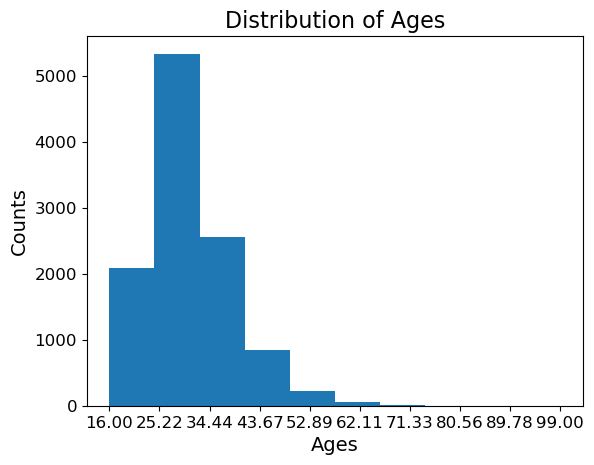

In [16]:
# your code goes here

# Drop na values
df.dropna(subset = ['Age'])

# Let's create the bins for the histogram
bins2 =np.linspace(min(df['Age']), max(df['Age']), 10)

# Let's create the histogram
df['Age'].plot(kind = 'hist', xticks = bins2)
plt.title('Distribution of Ages',size = 16)
plt.xlabel('Ages', size = 14)
plt.ylabel('Counts', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Ages')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

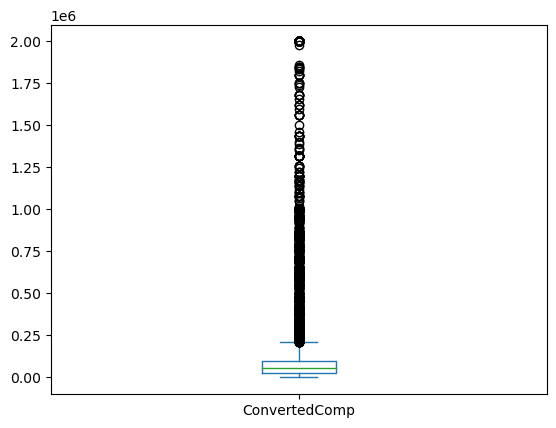

In [12]:
# your code goes here
df['ConvertedComp'].plot(kind = 'box')


#Box plot for 'Age' column
#df['Age'].plot(kind = 'box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
df[['ConvertedComp']].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[(df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))]
    return outliers

out = find_outliers_IQR(df['ConvertedComp']).to_frame()
out
#print(len(out))

,ConvertedComp
3,455352.0
13,1100000.0
45,229016.0
46,2000000.0
60,1000000.0
...,...
11296,840000.0
11303,1000000.0
11350,300000.0
11353,260000.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# your code goes here

df['ConvertedComp'] = df['ConvertedComp'].drop(out.index)
df['ConvertedComp']
df_new = df[['ConvertedComp']].dropna()
df_new

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
4,65277.0
5,31140.0
...,...
11392,9600.0
11393,130000.0
11394,19880.0
11395,105000.0


In [21]:
df_mean = df_new['ConvertedComp'].mean()
df_mean
print("The mean for the Yearly Compensations in US$ is {}". format(df_mean))

The mean for the Yearly Compensations in US$ is 59883.20838915799


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000')])

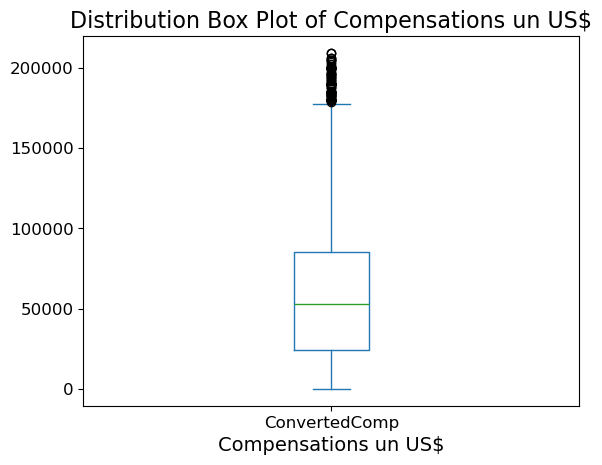

In [24]:
# Plot the new Box Plot without outliers
df_new['ConvertedComp'].plot(kind = 'box')
plt.title('Distribution Box Plot of Compensations un US\$', size = 16)
plt.xlabel('Compensations un US\$', size = 14)
plt.ylabel('', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
# your code goes here
df.corr()['Age'].sort_values(ascending = False).to_frame()

,Age
Age,1.000000
ConvertedComp,0.402903
WorkWeekHrs,0.036518
CompTotal,0.006970
Respondent,0.004041
CodeRevHrs,-0.020469


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
